In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,matplotlib,tensorflow

CPython 3.6.8
IPython 7.2.0

numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.2
tensorflow 1.13.1


**10장 – 인공 신경망 소개**

_이 노트북은 10장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

# 설정

파이썬 2와 3을 모두 지원합니다. 공통 모듈을 임포트하고 맷플롯립 그림이 노트북 안에 포함되도록 설정하고 생성한 그림을 저장하기 위한 함수를 준비합니다:

In [2]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 퍼셉트론

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/home/haesun/anaconda3/envs/handson-ml/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [4]:
y_pred

array([1])

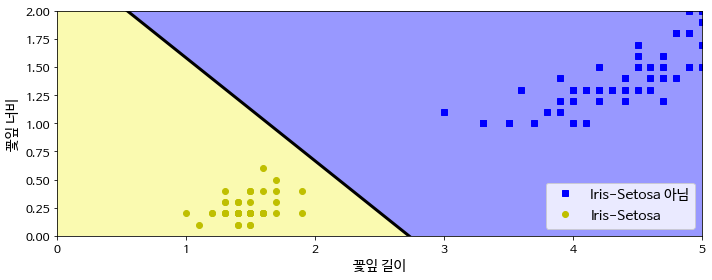

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 활성화 함수

In [6]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

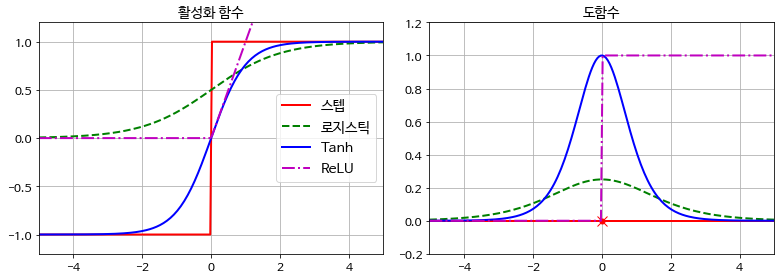

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

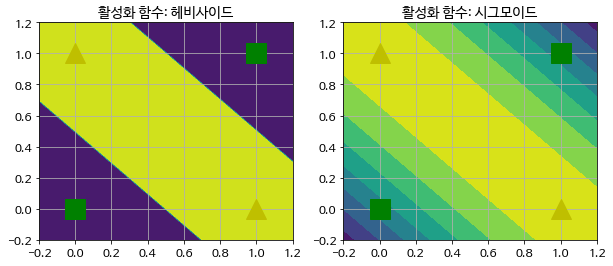

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 헤비사이드", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 시그모이드", fontsize=14)
plt.grid(True)

# MNIST를 위한 FNN

In [10]:
import tensorflow as tf

주의: `tf.examples.tutorials.mnist`은 삭제될 예정이므로 대신 `tf.keras.datasets.mnist`를 사용하겠습니다. `tf.contrib.learn` API는 `tf.estimator`와 `tf.feature_column`로 옮겨졌고 상당히 많이 바뀌었습니다. 특히 `infer_real_valued_columns_from_input()` 함수와 `SKCompat` 클래스가 없습니다.

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

## Estimator API를 사용

In [12]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpojfdm9i4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd26e16a2b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

INFO:tensorflow:loss = 2.2117522, step = 5301 (0.178 sec)
INFO:tensorflow:global_step/sec: 582.861
INFO:tensorflow:loss = 3.696426, step = 5401 (0.172 sec)
INFO:tensorflow:global_step/sec: 541.519
INFO:tensorflow:loss = 1.3339893, step = 5501 (0.185 sec)
INFO:tensorflow:global_step/sec: 556.986
INFO:tensorflow:loss = 0.6472928, step = 5601 (0.179 sec)
INFO:tensorflow:global_step/sec: 572.359
INFO:tensorflow:loss = 1.742102, step = 5701 (0.175 sec)
INFO:tensorflow:global_step/sec: 560.263
INFO:tensorflow:loss = 0.501868, step = 5801 (0.179 sec)
INFO:tensorflow:global_step/sec: 544.08
INFO:tensorflow:loss = 1.6975393, step = 5901 (0.184 sec)
INFO:tensorflow:global_step/sec: 573.919
INFO:tensorflow:loss = 0.30660093, step = 6001 (0.174 sec)
INFO:tensorflow:global_step/sec: 584.75
INFO:tensorflow:loss = 0.88393766, step = 6101 (0.171 sec)
INFO:tensorflow:global_step/sec: 589.588
INFO:tensorflow:loss = 0.44216326, step = 6201 (0.170 sec)
INFO:tensorflow:global_step/sec: 587.092
INFO:tensorf

INFO:tensorflow:loss = 0.011241686, step = 13501 (0.171 sec)
INFO:tensorflow:global_step/sec: 554.975
INFO:tensorflow:loss = 0.15866129, step = 13601 (0.180 sec)
INFO:tensorflow:global_step/sec: 536.806
INFO:tensorflow:loss = 0.10693681, step = 13701 (0.186 sec)
INFO:tensorflow:global_step/sec: 570.001
INFO:tensorflow:loss = 0.0871465, step = 13801 (0.177 sec)
INFO:tensorflow:global_step/sec: 504.71
INFO:tensorflow:loss = 0.07074093, step = 13901 (0.197 sec)
INFO:tensorflow:global_step/sec: 575.315
INFO:tensorflow:loss = 0.22189362, step = 14001 (0.174 sec)
INFO:tensorflow:global_step/sec: 549.441
INFO:tensorflow:loss = 0.11603419, step = 14101 (0.182 sec)
INFO:tensorflow:global_step/sec: 547.624
INFO:tensorflow:loss = 0.14664313, step = 14201 (0.183 sec)
INFO:tensorflow:global_step/sec: 539.533
INFO:tensorflow:loss = 0.42555675, step = 14301 (0.185 sec)
INFO:tensorflow:global_step/sec: 527.497
INFO:tensorflow:loss = 0.37917304, step = 14401 (0.190 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 527.613
INFO:tensorflow:loss = 0.016053233, step = 21701 (0.189 sec)
INFO:tensorflow:global_step/sec: 547.151
INFO:tensorflow:loss = 0.022209248, step = 21801 (0.183 sec)
INFO:tensorflow:global_step/sec: 528.985
INFO:tensorflow:loss = 0.028935524, step = 21901 (0.189 sec)
INFO:tensorflow:global_step/sec: 547.061
INFO:tensorflow:loss = 0.06261704, step = 22001 (0.183 sec)
INFO:tensorflow:global_step/sec: 559.372
INFO:tensorflow:loss = 0.068284065, step = 22101 (0.179 sec)
INFO:tensorflow:global_step/sec: 570.905
INFO:tensorflow:loss = 0.14644632, step = 22201 (0.175 sec)
INFO:tensorflow:global_step/sec: 566.876
INFO:tensorflow:loss = 0.04378733, step = 22301 (0.177 sec)
INFO:tensorflow:global_step/sec: 547.441
INFO:tensorflow:loss = 0.021930942, step = 22401 (0.183 sec)
INFO:tensorflow:global_step/sec: 554.175
INFO:tensorflow:loss = 0.025536126, step = 22501 (0.180 sec)
INFO:tensorflow:global_step/sec: 570.44
INFO:tensorflow:loss = 0.08840186, step = 226

INFO:tensorflow:loss = 0.021201316, step = 29701 (0.187 sec)
INFO:tensorflow:global_step/sec: 522.232
INFO:tensorflow:loss = 0.0077635464, step = 29801 (0.191 sec)
INFO:tensorflow:global_step/sec: 568.277
INFO:tensorflow:loss = 0.022789955, step = 29901 (0.176 sec)
INFO:tensorflow:global_step/sec: 542.034
INFO:tensorflow:loss = 0.001063808, step = 30001 (0.185 sec)
INFO:tensorflow:global_step/sec: 535.901
INFO:tensorflow:loss = 0.0066127866, step = 30101 (0.186 sec)
INFO:tensorflow:global_step/sec: 525.904
INFO:tensorflow:loss = 0.081749484, step = 30201 (0.191 sec)
INFO:tensorflow:global_step/sec: 557.617
INFO:tensorflow:loss = 0.0075727557, step = 30301 (0.179 sec)
INFO:tensorflow:global_step/sec: 559.862
INFO:tensorflow:loss = 0.010309324, step = 30401 (0.178 sec)
INFO:tensorflow:global_step/sec: 569.734
INFO:tensorflow:loss = 0.014869677, step = 30501 (0.176 sec)
INFO:tensorflow:global_step/sec: 563.707
INFO:tensorflow:loss = 0.10320924, step = 30601 (0.177 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 547.962
INFO:tensorflow:loss = 0.006090905, step = 37801 (0.183 sec)
INFO:tensorflow:global_step/sec: 512.349
INFO:tensorflow:loss = 0.027446099, step = 37901 (0.195 sec)
INFO:tensorflow:global_step/sec: 549.77
INFO:tensorflow:loss = 0.010040886, step = 38001 (0.182 sec)
INFO:tensorflow:global_step/sec: 565.766
INFO:tensorflow:loss = 0.0040907385, step = 38101 (0.177 sec)
INFO:tensorflow:global_step/sec: 554.925
INFO:tensorflow:loss = 0.0064082625, step = 38201 (0.180 sec)
INFO:tensorflow:global_step/sec: 555.812
INFO:tensorflow:loss = 0.016764032, step = 38301 (0.180 sec)
INFO:tensorflow:global_step/sec: 532.655
INFO:tensorflow:loss = 0.015445124, step = 38401 (0.188 sec)
INFO:tensorflow:global_step/sec: 571.298
INFO:tensorflow:loss = 0.005340596, step = 38501 (0.175 sec)
INFO:tensorflow:global_step/sec: 585.672
INFO:tensorflow:loss = 0.010536489, step = 38601 (0.171 sec)
INFO:tensorflow:global_step/sec: 567.296
INFO:tensorflow:loss = 0.00047024354, st

In [13]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T07:47:05Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpojfdm9i4/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-07:47:05
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9805, average_loss = 0.10441127, global_step = 44000, loss = 13.216616
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpojfdm9i4/model.ckpt-44000


In [14]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.10441127,
 'loss': 13.216616,
 'global_step': 44000}

In [15]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpojfdm9i4/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -1.8939482 ,   1.5261059 ,  -4.122183  ,   0.98258054,
         -6.645769  ,  -3.2733636 , -16.164238  ,  24.242487  ,
          1.1082871 ,   1.5906262 ], dtype=float32),
 'probabilities': array([4.4574934e-12, 1.3627025e-10, 4.8015384e-13, 7.9131764e-11,
        3.8494690e-14, 1.1220653e-12, 2.8286756e-18, 1.0000000e+00,
        8.9731507e-11, 1.4535223e-10], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

## `tf.contrib.learn`을 사용

In [16]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("/tmp/data/")

In [17]:
# X_train = mnist.train.images
# X_test = mnist.test.images
# y_train = mnist.train.labels.astype("int")
# y_test = mnist.test.labels.astype("int")

In [18]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # 책에는 없음

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None,

INFO:tensorflow:global_step/sec: 613.202
INFO:tensorflow:loss = 0.05732553, step = 2601 (0.163 sec)
INFO:tensorflow:global_step/sec: 579.699
INFO:tensorflow:loss = 0.030963503, step = 2701 (0.172 sec)
INFO:tensorflow:global_step/sec: 579.885
INFO:tensorflow:loss = 0.041068997, step = 2801 (0.172 sec)
INFO:tensorflow:global_step/sec: 616.332
INFO:tensorflow:loss = 0.072006404, step = 2901 (0.162 sec)
INFO:tensorflow:global_step/sec: 598.507
INFO:tensorflow:loss = 0.022036154, step = 3001 (0.167 sec)
INFO:tensorflow:global_step/sec: 570.647
INFO:tensorflow:loss = 0.05341647, step = 3101 (0.175 sec)
INFO:tensorflow:global_step/sec: 588.379
INFO:tensorflow:loss = 0.017184652, step = 3201 (0.170 sec)
INFO:tensorflow:global_step/sec: 612.442
INFO:tensorflow:loss = 0.020275978, step = 3301 (0.163 sec)
INFO:tensorflow:global_step/sec: 566.463
INFO:tensorflow:loss = 0.159838, step = 3401 (0.177 sec)
INFO:tensorflow:global_step/sec: 587.199
INFO:tensorflow:loss = 0.09738517, step = 3501 (0.170 s

INFO:tensorflow:loss = 0.02476872, step = 10701 (0.176 sec)
INFO:tensorflow:global_step/sec: 605.303
INFO:tensorflow:loss = 0.005142131, step = 10801 (0.165 sec)
INFO:tensorflow:global_step/sec: 555.011
INFO:tensorflow:loss = 0.0014687899, step = 10901 (0.180 sec)
INFO:tensorflow:global_step/sec: 603.142
INFO:tensorflow:loss = 0.021500275, step = 11001 (0.166 sec)
INFO:tensorflow:global_step/sec: 565.798
INFO:tensorflow:loss = 0.0057202443, step = 11101 (0.178 sec)
INFO:tensorflow:global_step/sec: 557.872
INFO:tensorflow:loss = 0.0013711127, step = 11201 (0.178 sec)
INFO:tensorflow:global_step/sec: 554.369
INFO:tensorflow:loss = 0.0060190703, step = 11301 (0.180 sec)
INFO:tensorflow:global_step/sec: 610.71
INFO:tensorflow:loss = 0.0090283295, step = 11401 (0.164 sec)
INFO:tensorflow:global_step/sec: 613.598
INFO:tensorflow:loss = 0.012596136, step = 11501 (0.163 sec)
INFO:tensorflow:global_step/sec: 550.469
INFO:tensorflow:loss = 0.00064278586, step = 11601 (0.182 sec)
INFO:tensorflow:

INFO:tensorflow:loss = 0.00084020704, step = 18701 (0.167 sec)
INFO:tensorflow:global_step/sec: 576.933
INFO:tensorflow:loss = 0.0021770515, step = 18801 (0.173 sec)
INFO:tensorflow:global_step/sec: 555.231
INFO:tensorflow:loss = 0.0031298078, step = 18901 (0.180 sec)
INFO:tensorflow:global_step/sec: 607.102
INFO:tensorflow:loss = 0.0009287165, step = 19001 (0.165 sec)
INFO:tensorflow:global_step/sec: 529.179
INFO:tensorflow:loss = 0.00043610687, step = 19101 (0.189 sec)
INFO:tensorflow:global_step/sec: 630.364
INFO:tensorflow:loss = 0.00049805274, step = 19201 (0.159 sec)
INFO:tensorflow:global_step/sec: 601.334
INFO:tensorflow:loss = 0.0047699637, step = 19301 (0.166 sec)
INFO:tensorflow:global_step/sec: 613.145
INFO:tensorflow:loss = 0.00069915206, step = 19401 (0.163 sec)
INFO:tensorflow:global_step/sec: 603.905
INFO:tensorflow:loss = 0.0023377547, step = 19501 (0.166 sec)
INFO:tensorflow:global_step/sec: 541.987
INFO:tensorflow:loss = 0.0005096203, step = 19601 (0.184 sec)
INFO:te

INFO:tensorflow:global_step/sec: 562.834
INFO:tensorflow:loss = 2.1493912e-05, step = 26701 (0.178 sec)
INFO:tensorflow:global_step/sec: 581.117
INFO:tensorflow:loss = 0.00045070797, step = 26801 (0.172 sec)
INFO:tensorflow:global_step/sec: 579.912
INFO:tensorflow:loss = 0.00093468383, step = 26901 (0.172 sec)
INFO:tensorflow:global_step/sec: 596.649
INFO:tensorflow:loss = 0.0006957704, step = 27001 (0.169 sec)
INFO:tensorflow:global_step/sec: 567.435
INFO:tensorflow:loss = 0.00052795606, step = 27101 (0.175 sec)
INFO:tensorflow:global_step/sec: 618.532
INFO:tensorflow:loss = 0.00044472318, step = 27201 (0.162 sec)
INFO:tensorflow:global_step/sec: 620.087
INFO:tensorflow:loss = 0.0009544973, step = 27301 (0.161 sec)
INFO:tensorflow:global_step/sec: 572.733
INFO:tensorflow:loss = 0.00013921122, step = 27401 (0.176 sec)
INFO:tensorflow:global_step/sec: 578.235
INFO:tensorflow:loss = 0.0014383527, step = 27501 (0.172 sec)
INFO:tensorflow:global_step/sec: 625.161
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.0004739043, step = 34601 (0.161 sec)
INFO:tensorflow:global_step/sec: 543.304
INFO:tensorflow:loss = 0.0015119809, step = 34701 (0.184 sec)
INFO:tensorflow:global_step/sec: 597.189
INFO:tensorflow:loss = 0.000674001, step = 34801 (0.167 sec)
INFO:tensorflow:global_step/sec: 581.494
INFO:tensorflow:loss = 0.00034475912, step = 34901 (0.172 sec)
INFO:tensorflow:global_step/sec: 569.123
INFO:tensorflow:loss = 0.00055940147, step = 35001 (0.176 sec)
INFO:tensorflow:global_step/sec: 586.16
INFO:tensorflow:loss = 0.00087014853, step = 35101 (0.171 sec)
INFO:tensorflow:global_step/sec: 549.67
INFO:tensorflow:loss = 0.00023894513, step = 35201 (0.182 sec)
INFO:tensorflow:global_step/sec: 572.214
INFO:tensorflow:loss = 0.000138041, step = 35301 (0.175 sec)
INFO:tensorflow:global_step/sec: 556.875
INFO:tensorflow:loss = 0.0011388202, step = 35401 (0.181 sec)
INFO:tensorflow:global_step/sec: 582.317
INFO:tensorflow:loss = 0.00018684927, step = 35501 (0.171 sec)
INFO:tenso

SKCompat()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgxyz4krv/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9817

In [20]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07212044412362126

## 저수준의 TensorFlow API 사용

In [21]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [22]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [23]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [24]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [25]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [26]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [27]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
n_epochs = 40
batch_size = 50

In [30]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [31]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9146
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.936
2 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9448
3 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.951
4 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9558
5 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9566
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9612
7 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9632
8 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9648
9 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9662
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9686
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9688
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9666
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9706
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9712
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9732
16 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9732
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9742
18 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9748
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9744
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9748
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.976
22 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9766
23 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9752
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9766
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9768
26 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9

In [32]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # 또는 save_path를 사용합니다
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [33]:
print("예측 클래스:", y_pred)
print("진짜 클래스:", y_test[:20])

예측 클래스: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [34]:
from tensorflow_graph_in_jupyter import show_graph

In [35]:
show_graph(tf.get_default_graph())

## `neuron_layer()` 대신 `dense()` 사용

In [36]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [37]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [38]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [39]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [40]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [41]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [42]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [43]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9024
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9254
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9372
3 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9416
4 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.947
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.951
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9548
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9612
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9622
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.965
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9654
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9668
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9686
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9702
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9696
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9718
16 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9728
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9728
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.975
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9754


In [44]:
show_graph(tf.get_default_graph())

# 연습문제 정답

## 1. to 8.

부록 A 참조.

## 9.

_깊은 다층 퍼셉트론을 MNIST 데이터셋에 훈련시키고 98% 정확도를 얻을 수 있는지 확인해보세요. 9장의 마지막 연습문제에서와 같이 모든 부가 기능을 추가해보세요(즉, 체크포인트를 저장하고, 중지되었을 때 마지막 체크포인트를 복원하고, 서머리를 추가하고, 텐서보드를 사용해 학습 곡선을 그려보세요)._

먼저 심층 신경망을 만듭니다. 한가지 추가된 것 외에는 앞서 했던 것과 동일합니다. 텐서보드에서 학습 곡선을 볼 수 있도록 훈련하는 동안 손실과 정확도를 기록하는 `tf.summary.scalar()` 추가합니다.

In [45]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [46]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [47]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [48]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [49]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [50]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [51]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

텐서보드 로그를 기록할 디렉토리를 정의합니다:

In [52]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [53]:
logdir = log_dir("mnist_dnn")

텐서보드 로그를 작성하는 데 필요한 `FileWriter` 객체를 만듭니다:

In [54]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

잠시만요! 조기 종료를 구현하는 것이 좋겠죠? 이렇게 하려면 검증 세트가 필요합니다.

In [55]:
# X_valid = mnist.validation.images
# y_valid = mnist.validation.labels

In [56]:
m, n = X_train.shape

In [57]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # 체크포인트 파일이 있으면 모델을 복원하고 에포크 숫자를 로드합니다
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("이전 훈련이 중지되었습니다. 에포크 {}에서 시작합니다".format(start_epoch))
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("에포크:", epoch,
                  "\t검증 세트 정확도: {:.3f}%".format(accuracy_val * 100),
                  "\t손실: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("조기 종료")
                    break

에포크: 0 	검증 세트 정확도: 90.240% 	손실: 0.35380
에포크: 5 	검증 세트 정확도: 95.100% 	손실: 0.17919
에포크: 10 	검증 세트 정확도: 96.540% 	손실: 0.12785
에포크: 15 	검증 세트 정확도: 97.180% 	손실: 0.10325
에포크: 20 	검증 세트 정확도: 97.480% 	손실: 0.09168
에포크: 25 	검증 세트 정확도: 97.620% 	손실: 0.08212
에포크: 30 	검증 세트 정확도: 97.760% 	손실: 0.07890
에포크: 35 	검증 세트 정확도: 97.800% 	손실: 0.07426
에포크: 40 	검증 세트 정확도: 97.840% 	손실: 0.07170
에포크: 45 	검증 세트 정확도: 98.080% 	손실: 0.06751
에포크: 50 	검증 세트 정확도: 98.040% 	손실: 0.06737
에포크: 55 	검증 세트 정확도: 98.040% 	손실: 0.06689
에포크: 60 	검증 세트 정확도: 98.040% 	손실: 0.06732
에포크: 65 	검증 세트 정확도: 98.220% 	손실: 0.06677
에포크: 70 	검증 세트 정확도: 98.180% 	손실: 0.06617
에포크: 75 	검증 세트 정확도: 98.100% 	손실: 0.06657
에포크: 80 	검증 세트 정확도: 98.160% 	손실: 0.06677
에포크: 85 	검증 세트 정확도: 98.260% 	손실: 0.06613
에포크: 90 	검증 세트 정확도: 98.200% 	손실: 0.06754
에포크: 95 	검증 세트 정확도: 98.140% 	손실: 0.06903
에포크: 100 	검증 세트 정확도: 98.220% 	손실: 0.06893
에포크: 105 	검증 세트 정확도: 98.220% 	손실: 0.07091
에포크: 110 	검증 세트 정확도: 98.200% 	손실: 0.07081
에포크: 115 	검증 세트 정확도: 98.280% 	손실: 0.07086
에포크: 120 	검증 세

In [58]:
os.remove(checkpoint_epoch_path)

In [59]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [60]:
accuracy_val

0.9796